# アタポン
* アタポンのデータに絞る
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* ローカル線形トレンドモデルにしてみる

## インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

## イベントデータ読み込み

In [2]:
input_dir = '../event_data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,2001位,形式,属性,期間
日付,,,,,
2015-09-25,アタシポンコツアンドロイド,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,58517,アタポン,NaN,198.0


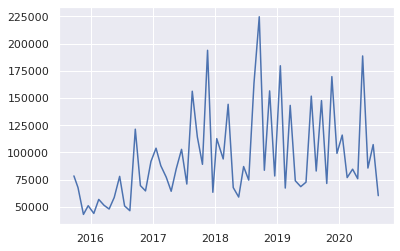

In [4]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '2001位']
ax.plot(x, y)
plt.show()

## stanデータ準備

In [5]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'y':       df['2001位'].tolist(), # 観測値
}

In [8]:
# Stanコード
model = """
data {
  int T;                   // データ取得期間の長さ
  vector[T] y;       // 観測値
}
parameters {
  vector[T] mu;      // 水準+ドリフト成分の推定値
  vector[T] delta;   // ドリフト成分の推定値
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_z; // ドリフト成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1] + delta[i-1], s_w);
    delta[i] ~ normal(delta[i-1], s_z);
    y[i] ~ normal(mu[i], s_v);
  }
}
"""

# Stan実行

In [9]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6756962f483cdcec6d2c866a76ea3170 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpuzooo4d1\stanfit4anon_model_6756962f483cdcec6d2c866a76ea3170_8779715265766317936.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 22.1 s


In [10]:
# パラメータ設定
n_itr = 8000
n_warmup = n_itr - 1000
chains = 3

In [11]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

Wall time: 39.6 s


In [12]:
# fit後のファイル保存
save_dir = '../event_data/'
with open(save_dir + 'c3_stan.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  after removing the cwd from sys.path.


In [13]:
# 読み込み
with open(save_dir + 'c3_stan.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [14]:
fit

Inference for Stan model: anon_model_6756962f483cdcec6d2c866a76ea3170.
3 chains, each with iter=8000; warmup=7000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]      4.9e4  634.28  2.1e4 5061.5  3.6e4  4.9e4  6.2e4  9.0e4   1058    1.0
mu[1]      5.0e4  552.19  1.8e4  1.4e4  3.9e4  5.1e4  6.2e4  8.6e4   1047   1.01
mu[2]      5.2e4  520.37  1.6e4  1.9e4  4.2e4  5.2e4  6.3e4  8.3e4    943   1.01
mu[3]      5.4e4   565.7  1.5e4  2.5e4  4.4e4  5.4e4  6.4e4  8.2e4    673   1.01
mu[4]      5.5e4  544.57  1.4e4  2.8e4  4.6e4  5.6e4  6.5e4  8.2e4    644   1.01
mu[5]      5.7e4  528.74  1.3e4  3.1e4  4.9e4  5.8e4  6.6e4  8.3e4    618    1.0
mu[6]      6.0e4  512.12  1.3e4  3.4e4  5.1e4  6.0e4  6.8e4  8.4e4    619    1.0
mu[7]      6.2e4  513.06  1.2e4  3.7e4  5.4e4  6.2e4  7.0e4  8.5e4    581    1.0
mu[8]      6.4e4  449.97  1.2e4  4.0e4  5.6e4  6.5e4  7.2e4  8.7e4    704    1.0
m

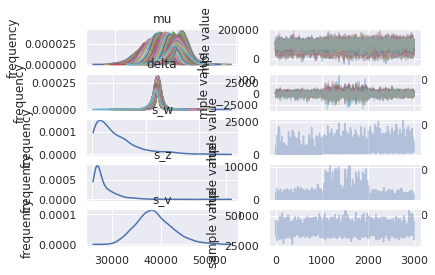

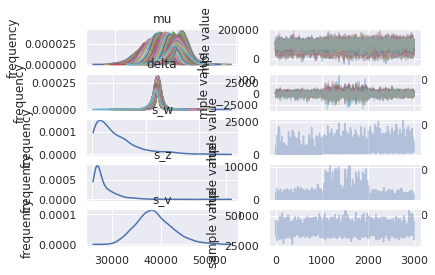

In [15]:
fit.plot()

In [16]:
#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# delta
# 事後平均
delta_mean = ms['delta'].mean(axis=0)
# #95パーセンタイル抽出
delta_5 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 5), axis=0))
delta_95 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 95), axis=0))

#x軸
X = df.index

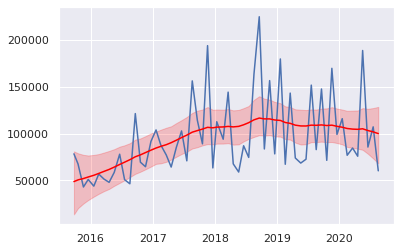

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
# ax.plot(X, mu, label='true trend', c='green')
ax.plot(X, mu_mean, label='predicted trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

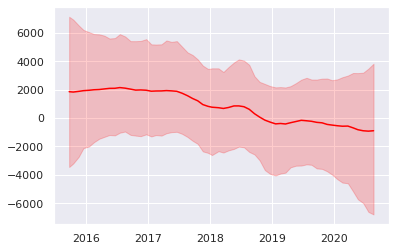

In [18]:
# delta
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, delta_mean, label='predicted trend', c='red')
plt.fill_between(X, delta_5, delta_95, color='red', alpha=0.2)
plt.show()

* こちらも全然当たっていない
* やはり、平滑化トレンドの滑らかさとローカルトレンドのガタガタの中間くらいになってる